In [311]:
# Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [312]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [313]:
# import the csv file
bike = pd.read_csv("day.csv")

In [314]:
# Check the head of the dataset
bike.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [315]:
# check the shape of the dataset
bike.shape

(730, 16)

In [316]:
# check the info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [317]:
#Check the descriptive  statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Check the null and missing values

In [318]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [319]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

### Removing the unwanted columns

In [320]:
# Let's first check the column
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Here instant is only index type, dteday has the date but the yr and mnth column are present in the dataframe that's why get rid of it. In this model building only cnt to be considered which is the sum of the casual and registered. Finaly making a new data frame with necessary column.

In [321]:
bike_new = bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [322]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [323]:
bike_new['season'] = bike_new['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"})
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Weather Condtion
- Weather Condtion 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- Weather Condtion 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Weather Condtion 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Weather Condtion 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [324]:
bike_new['weathersit'] = bike_new['weathersit'].replace({1:"Clear Few clouds",2:"Mist + Cloudy",
                                3:"Light Snow,Light Rain",
                                4:"Heavy Rain + Ice Pallets"})
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear Few clouds,9.305237,11.46350,43.6957,12.522300,1600


In [325]:
bike_new['weekday'] = bike_new['weekday'].replace({0:"Sunday", 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bike_new.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear Few clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear Few clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear Few clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear Few clouds,6.184153,7.54440,48.2917,14.958889,1321


In [326]:
bike_new['mnth'] = bike_new['mnth'].astype('category')

In [327]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(1), float64(4), int64(4), object(3)
memory usage: 64.0+ KB


In [328]:
bike_new[['temp','atemp','hum','windspeed','cnt']] = bike_new[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [329]:
bike_new.weekday.value_counts()

Monday       105
Saturday     105
Sunday       105
Thursday     104
Tuesday      104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [330]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(1), float64(4), int64(4), object(3)
memory usage: 64.0+ KB


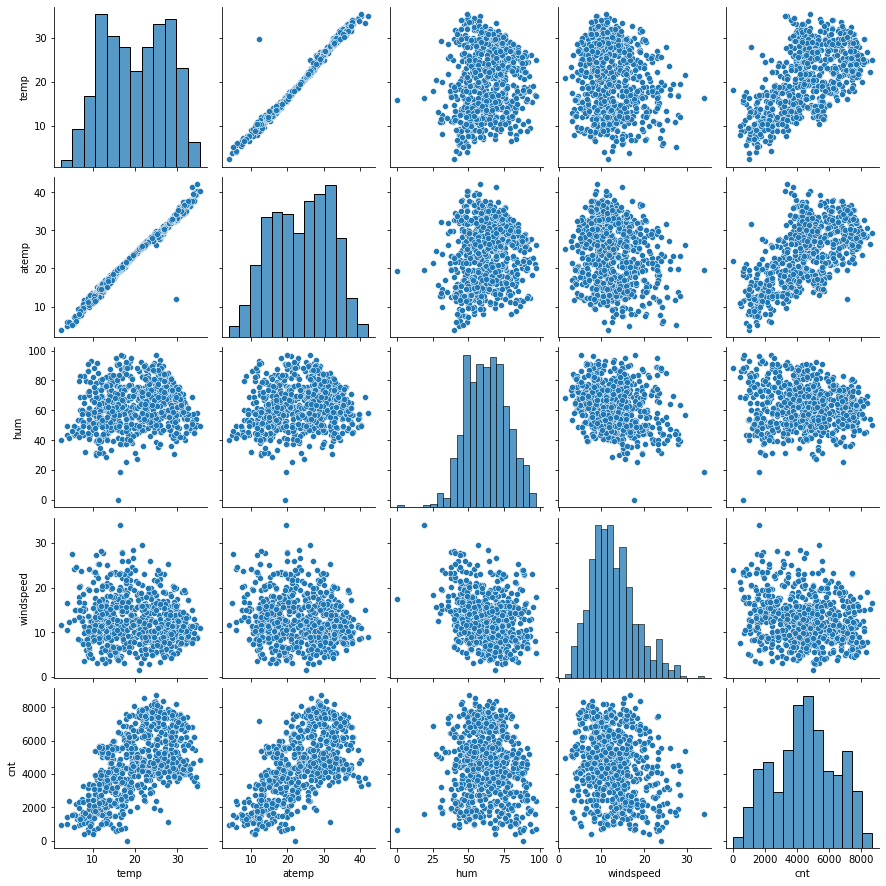

In [331]:
sns.pairplot(bike_new, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

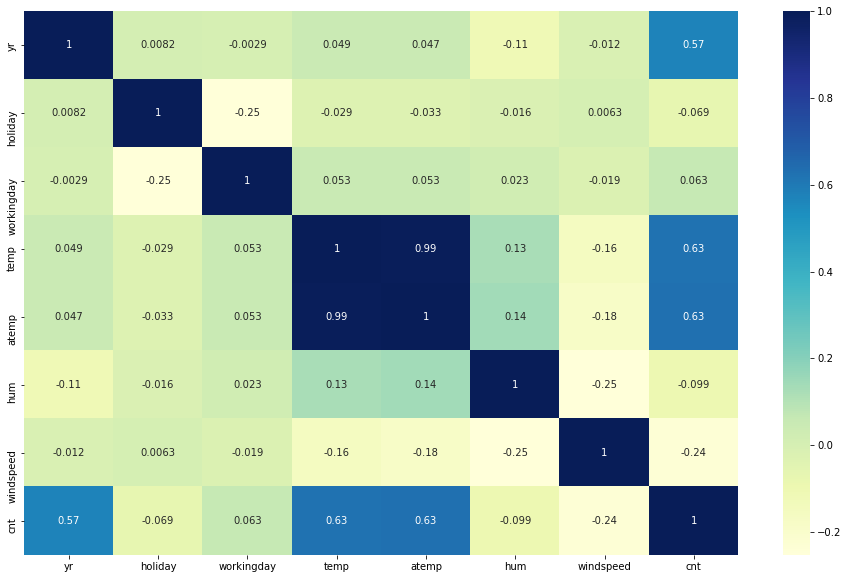

In [332]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Univariate Analysis

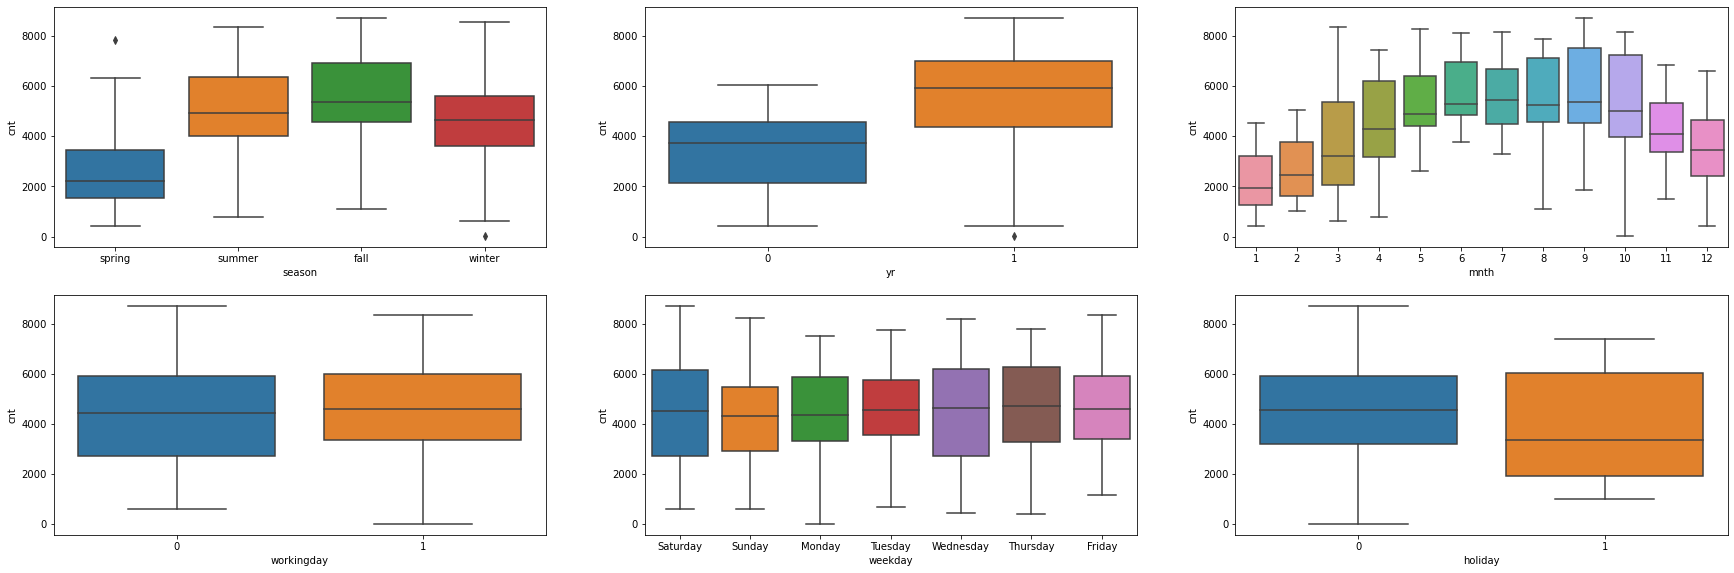

In [333]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.show()

#### Bivariate Analysis

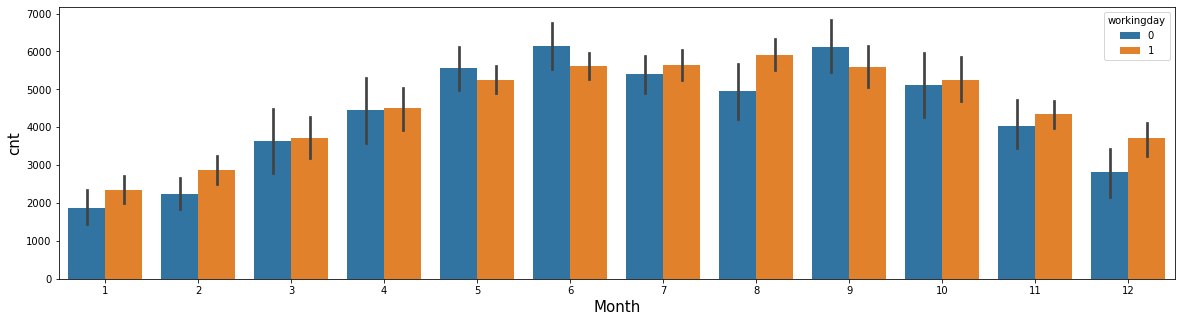

In [334]:
plt.figure(figsize=(20, 5))
sns.barplot(data=bike_new, x='mnth', y='cnt', hue='workingday')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('cnt', fontsize = 15)
plt.show()

#### The month of 6 and 9 for workingday has the high demand of bike sharing

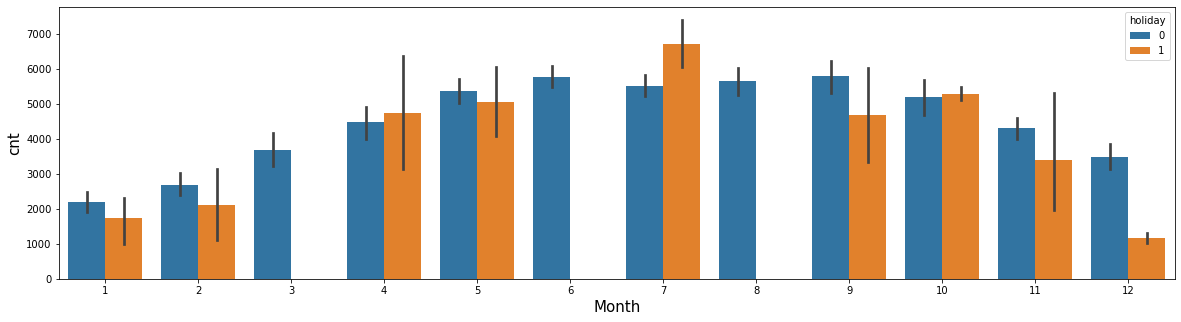

In [335]:
plt.figure(figsize=(20, 5))
sns.barplot(data=bike_new, x='mnth', y='cnt', hue='holiday')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('cnt', fontsize = 15)
plt.show()

#### The month of 7 for holiday has the highest demand of bike sharing

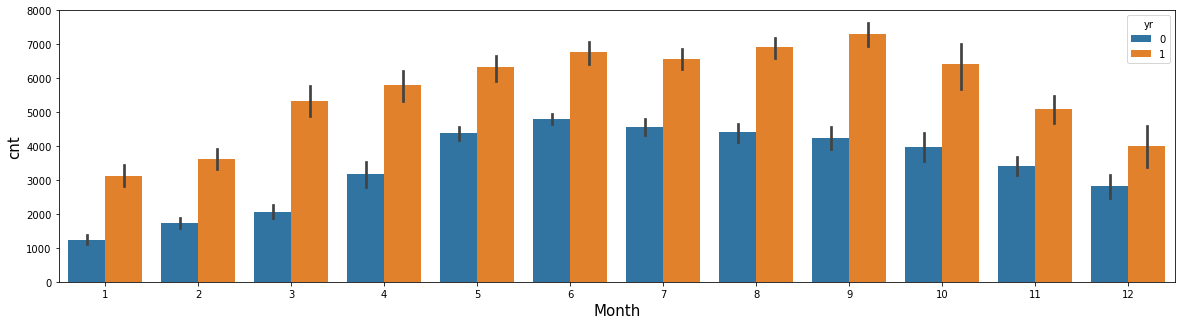

In [336]:
plt.figure(figsize=(20, 5))
sns.barplot(data=bike_new, x='mnth', y='cnt', hue='yr')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('cnt', fontsize = 15)
plt.show()

#### The year of 2019 have the highest demand for bike sharing for all month
- This is clear indication of growing popularity of bike sharing demand from previous year

## Preparing the Data for Modeling
- Creating the dummy variable of categorical variable

In [337]:
# Creating dummy variable for categorical data
# Let's drop the first column using 'drop_first = True'

Season_Condition = pd.get_dummies(bike_new['season'])
Weather_Condition=pd.get_dummies(bike_new['weathersit'])
Day_Of_Week=pd.get_dummies(bike_new['weekday'])
Month=pd.get_dummies(bike_new['mnth'])

In [338]:
# Add the season dummy variable to the original bike dataframe
bike_new = pd.concat([bike_new,Season_Condition],axis=1)

In [339]:
# Add the weathersit dummy variable to the original bike dataframe
bike_new = pd.concat([bike_new,Weather_Condition],axis=1)

In [340]:
# Add the weekday dummy variable to the original bike dataframe
bike_new = pd.concat([bike_new,Day_Of_Week],axis=1)

In [341]:
# Add the mnth dummy variable to the original bike dataframe
bike_new = pd.concat([bike_new,Month],axis=1)

In [342]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Clear Few clouds,"Light Snow,Light Rain",Mist + Cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Clear Few clouds,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear Few clouds,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Clear Few clouds,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [343]:
bike_new.dtypes

season                     object
yr                          int64
mnth                     category
holiday                     int64
weekday                    object
workingday                  int64
weathersit                 object
temp                      float64
atemp                     float64
hum                       float64
windspeed                 float64
cnt                         int64
fall                        uint8
spring                      uint8
summer                      uint8
winter                      uint8
Clear Few clouds            uint8
Light Snow,Light Rain       uint8
Mist + Cloudy               uint8
Friday                      uint8
Monday                      uint8
Saturday                    uint8
Sunday                      uint8
Thursday                    uint8
Tuesday                     uint8
Wednesday                   uint8
1                           uint8
2                           uint8
3                           uint8
4             

In [344]:
bike_new.shape

(730, 38)

In [345]:
# Deleting the orginal columns season, weathersit, weekday, mnth for
bike_new.drop(['season'],axis=1,inplace=True)
bike_new.drop(['weathersit'],axis=1,inplace=True)

bike_new.drop(['weekday'],axis=1,inplace=True)

bike_new.drop(['mnth'],axis=1,inplace=True)


bike_new.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Clear Few clouds,"Light Snow,Light Rain",Mist + Cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [346]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features
- We will use MinMax scaling.

In [347]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [348]:
# Apply scaler() to temp, atemp, hum, windspeed, cnt variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Clear Few clouds,"Light Snow,Light Rain",Mist + Cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [349]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Clear Few clouds,"Light Snow,Light Rain",Mist + Cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [350]:
col1 = df_train.columns
df_train_new = df_train[col1]

In [351]:
y_train = df_train_new.pop('cnt')
X_train = df_train_new

## Building our model
- This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [352]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [353]:
# Using RFE approach for feature selection
# Running RFE with the output number of the variable equal to 15 and using mixed approach for model building 
lm = LinearRegression()

lm.fit(X_train, y_train)
rfe = RFE(lm, 15)      
rfe = rfe.fit(X_train, y_train)

In [354]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Clear Few clouds', True, 1),
 ('Light Snow,Light Rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Friday', False, 13),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 18),
 ('Tuesday', False, 12),
 ('Wednesday', False, 19),
 (1, False, 2),
 (2, False, 5),
 (3, False, 15),
 (4, False, 16),
 (5, False, 9),
 (6, False, 17),
 (7, True, 1),
 (8, False, 10),
 (9, True, 1),
 (10, False, 14),
 (11, False, 3),
 (12, False, 4)]

In [355]:
# Rename the numerical month columns
X_train = X_train.rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [356]:
# Rename the numerical weekday columns
X_train = X_train.rename(columns={"Sunday":"Tuesday", "Monday":"Wednesday", "Tuesday":"Thursday", "Wednesday":"Friday", "Thursday":"Saturday", "Friday":"Sunday", "Saturday":"Monday"})

In [357]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'Clear Few clouds', 'Light Snow,Light Rain',
       'Mist + Cloudy', 'Monday', 'Jul', 'Sep'],
      dtype='object')

In [358]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'Sunday', 'Wednesday', 'Tuesday', 'Saturday',
       'Thursday', 'Friday', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Aug',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [359]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [360]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [361]:
lr = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [362]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.13e-191
Time:                        12:51:35   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [363]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [364]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Clear Few clouds,42.28
11,Mist + Cloudy,29.33
10,"Light Snow,Light Rain",4.05
3,temp,3.62
6,fall,2.74
7,spring,2.55
4,hum,1.91
2,workingday,1.88
8,winter,1.88
12,Monday,1.78


In [365]:
# Column Clear Few clouds has high VIF so drop it
X_train_rfe = X_train_rfe.drop(['Clear Few clouds'],axis=1)

In [366]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.13e-191
Time:                        12:51:38   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [367]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,23.78
3,temp,20.04
2,workingday,5.18
5,windspeed,4.25
6,fall,3.71
7,spring,2.63
8,winter,2.25
10,Mist + Cloudy,2.24
0,yr,2.07
11,Monday,1.94


#### In this model we see that the hum has high VIF so drop it

In [368]:
# Column hum has high VIF value
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

In [369]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.73e-189
Time:                        12:51:40   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [370]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,9.31
2,workingday,4.97
4,windspeed,4.25
5,fall,3.64
0,yr,2.06
6,spring,1.91
10,Monday,1.91
7,winter,1.71
11,Jul,1.59
9,Mist + Cloudy,1.54


In [371]:
# Column temp has high VIF so drop it
X_train_rfe = X_train_rfe.drop(['temp'], axis = 1)

In [372]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.01e-149
Time:                        12:51:41   Log-Likelihood:                 412.67
No. Observations:                 510   AIC:                            -799.3
Df Residuals:                     497   BIC:                            -744.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.49

In [373]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.75
3,windspeed,3.56
4,fall,2.67
0,yr,1.92
5,spring,1.77
6,winter,1.70
9,Monday,1.67
10,Jul,1.57
8,Mist + Cloudy,1.53
11,Sep,1.40


In [374]:
# Column Jul has very high p value so drop it
X_train_rfe = X_train_rfe.drop(['Jul'], axis = 1)

In [375]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.99e-151
Time:                        12:51:42   Log-Likelihood:                 412.55
No. Observations:                 510   AIC:                            -801.1
Df Residuals:                     498   BIC:                            -750.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.49

In [376]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.75
3,windspeed,3.56
4,fall,1.94
0,yr,1.92
5,spring,1.77
6,winter,1.69
9,Monday,1.67
8,Mist + Cloudy,1.52
10,Sep,1.27
1,holiday,1.13


In [377]:
# Column holiday has high p value so drop it
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)

In [378]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.40e-151
Time:                        12:51:43   Log-Likelihood:                 410.90
No. Observations:                 510   AIC:                            -799.8
Df Residuals:                     499   BIC:                            -753.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.48

In [379]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.48
2,windspeed,3.46
3,fall,1.92
0,yr,1.91
4,spring,1.73
5,winter,1.64
8,Monday,1.60
7,Mist + Cloudy,1.52
9,Sep,1.26
6,"Light Snow,Light Rain",1.08


### Now stop the model building and check on which model can we choose
#### Out all the models model lr5 seems to give good result  like the VIF of all the features are less then 5 and all the features are significant so we choose it.

### Residual Analysis of the train data
- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [380]:
y_train_pred = lr5.predict(X_train_rfe5)

In [381]:
res = y_train - y_train_pred

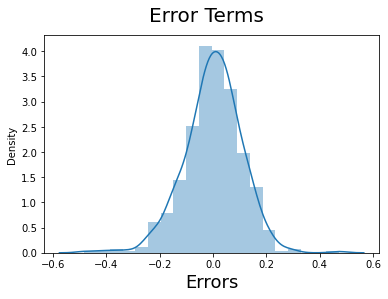

In [382]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### The mean of the error terms is 0 and the Error terms are normaly distributed

In [383]:
#Checking columns
X_train_rfe.columns

Index(['yr', 'workingday', 'windspeed', 'fall', 'spring', 'winter',
       'Light Snow,Light Rain', 'Mist + Cloudy', 'Monday', 'Sep'],
      dtype='object')

In [384]:
#Scaling the test data
# Here we are using only ternsform for scalling the test data because the test dataset should predict the dependent variable using the train dataset

num_vars=['temp', 'atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [385]:
# Rename the numerical month columns
df_test = df_test.rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [386]:
# Rename the numerical weekday columns
df_test = df_test.rename(columns={"Sunday":"Tuesday", "Monday":"Wednesday", "Tuesday":"Thursday", "Wednesday":"Friday", "Thursday":"Saturday", "Friday":"Sunday", "Saturday":"Monday"})

In [387]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [388]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

In [389]:
X_test_new.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'fall', 'spring', 'winter',
       'Light Snow,Light Rain', 'Mist + Cloudy', 'Monday', 'Sep'],
      dtype='object')

In [390]:
#Making predictions on the chosen model
y_pred = lr5.predict(X_test_new)

## Model Evaluation

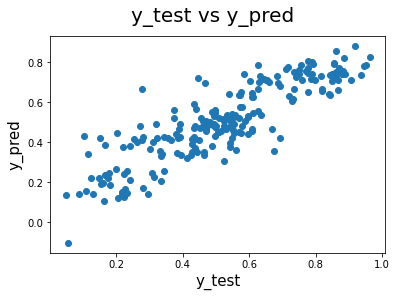

In [391]:
# Checking Predicted vs test data
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)   
plt.xlabel('y_test', fontsize = 15)                        
plt.ylabel('y_pred', fontsize = 15)                        
plt.show()

#### The model is good enough for predict the dimand of bikes. The actual and predict dimand are significantly overlaped.
#### This indicating that the model is able to explain the change in demand very well.

### Linear Regression Assumption Check.
- Linear Relationship between the target variable and the feature variables

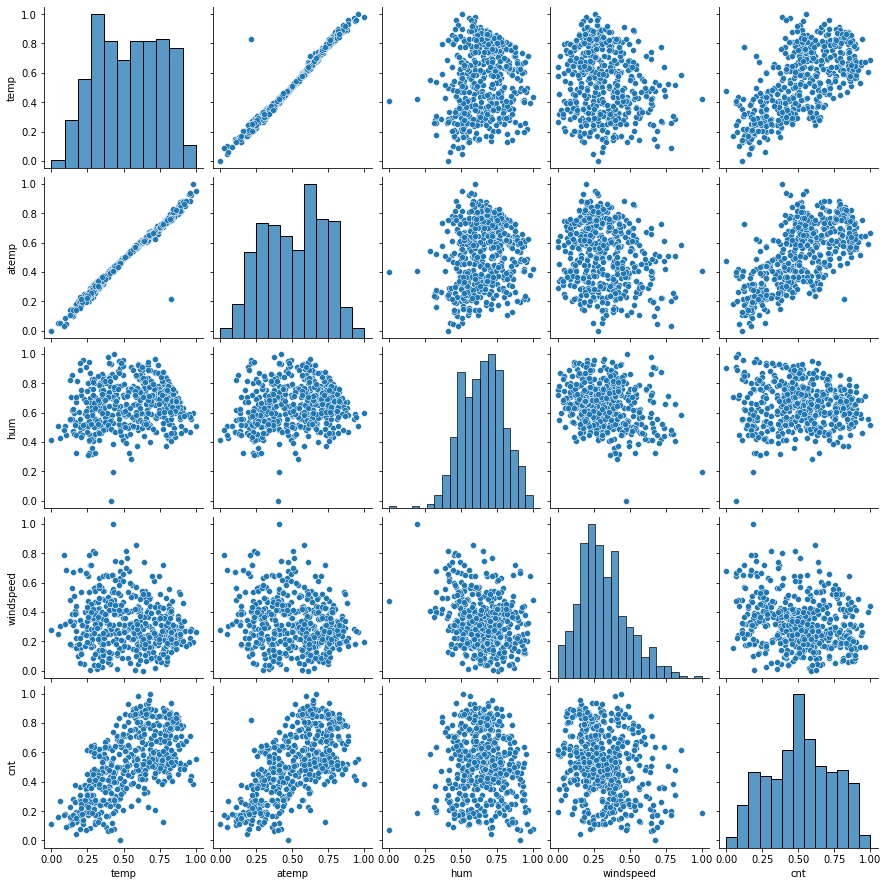

In [392]:
sns.pairplot(df_train, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### Observation: Using the pair plot, we could see there is a linear relation between temp and atemp variable with the ‘cnt’.

### Homoscedasticity Assumption:

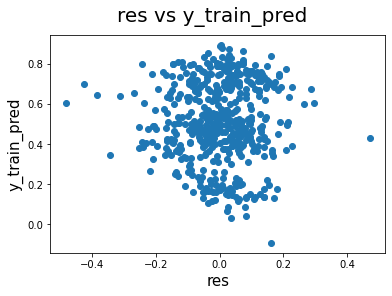

In [393]:
# Checking Homoscedasticity(Error terms have constant variance)
fig = plt.figure()
plt.scatter(res,y_train_pred)
fig.suptitle('res vs y_train_pred', fontsize = 20)   
plt.xlabel('res', fontsize = 15)                        
plt.ylabel('y_train_pred', fontsize = 15)                        
plt.show()

#### There is a clear view of equal variance from this plot.
#### There is no specific pattern in this distribution.

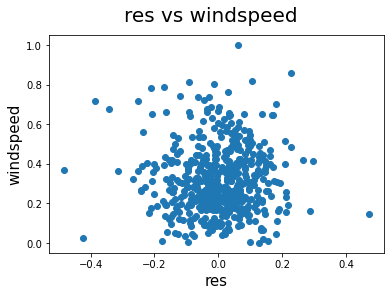

In [395]:
# Checking the Independence of the error terms
fig = plt.figure()
plt.scatter(res,X_train_rfe.windspeed)
fig.suptitle('res vs windspeed', fontsize = 20)   
plt.xlabel('res', fontsize = 15)                        
plt.ylabel('windspeed', fontsize = 15)                        
plt.show()

#### All the error terms are independent from each other.

#### Let's check the r2_score for test dataset.

In [284]:
from sklearn.metrics import r2_score

In [285]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
r_squared

0.7503732169558837

In [286]:
# Calculating the adjusted r square value for test
# We already have the value of R^2 (calculated in above step)
r2 = 0.7727998542187493

# Get the shape of X_test

X_test_new.shape

# n is number of rows in X

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7607264165202288

#### Final result comparison

#### The R Square and Adjusted R Square value for train dataset is 76.8 and 76.3 percent
#### The R Square and Adjusted R Square value for test dataset is 75 and 76 percent

### The final model.

In [287]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          3.40e-151
Time:                        22:32:02   Log-Likelihood:                 410.90
No. Observations:                 510   AIC:                            -799.8
Df Residuals:                     499   BIC:                            -753.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.48


### According to this observation the equation for best fitted line is:
### cnt = 0.488 + 0.247 X yr + 0.056 X workingday - 0.172 X windspeed + 0.041 X fall - 0.255 X spring - 0.031 X winter - 0.301 X Light Snow,Light Rain - 0.092 X Mist + Cloudy + 0.064 X Monday + 0.072 X Sep
- We can see the demand for bikes depends mainly on below variables:
- yr , workingday, windspeed, fall,  spring, winter, (Light Snow,Light Rain), Mist + Cloudy, Monday and the month of September.
- Demands increases in the month of September , yr, workingday, Monday and fall season
- Demand decreases with windspeed, spring, winter, (Light Snow, Light Rain), (Mist + Cloudy)